<function matplotlib.pyplot.show(*args, **kw)>

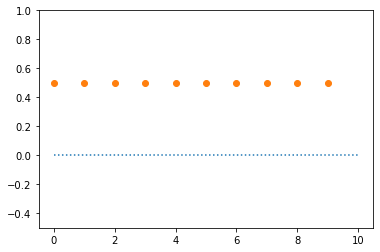

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

N = 10
y = np.zeros(N)
x1 = np.linspace(0, 10, N)
x2 = np.linspace(0,10,N, endpoint=False)
plt.ylim(-0.5, 1)
plt.plot(x1, y, ':')
plt.plot(x2, y + 0.5, 'o')
plt.show

In [94]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt('./data_samples/SLRM/toy_data.csv', delimiter=',')
X = data[:,0].reshape(-1,1)
X.shape

(100, 1)

In [95]:
ones = np.ones([X.shape[0], 1])
X = np.concatenate([ones, X], 1)
y = data[:,1].reshape(-1,1)

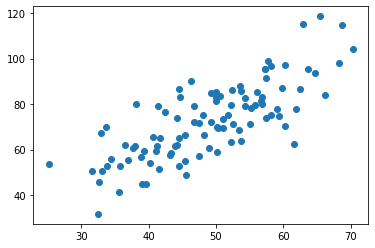

In [96]:
plt.scatter(data[:, 0].reshape(-1,1), y)
plt.show()

In [127]:
alpha = 0.0001
iters = 10000
theta = np.array([[1.0, 1.0]])

In [90]:
theta.shape

(1, 2)

In [89]:
theta.T.shape

(2, 1)

In [91]:
X.shape

(100, 3)

In [112]:
def cost(X,y, theta):
    error = np.power(((X @ theta.T) - y) , 2)
    return np.sum(error) / (2*len(X))

In [113]:
cost(X,y,theta)

319.40631589398157

In [136]:
def gd(X,y,theta,alpha,iters):
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum((X @ theta.T -y) * X, axis=0)
        c = cost(X,y,theta)
#         if i % 100 == 0:
#             print(c)
    return theta, c

In [137]:
g, c = gd(X,y,theta,alpha, iters)
print(g,c)

[[1.26761621 1.4545775 ]] 55.981994934756045


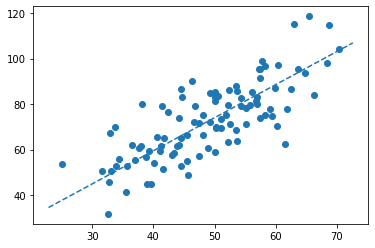

In [138]:
plt.scatter(data[:,0].reshape(-1,1), y)
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = g[0][0] + g[0][1] *x_vals
plt.plot(x_vals,y_vals, '--')
plt.show()

In [3]:
a = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
])
a.shape


(3, 4)

In [19]:
b = a.reshape(-1)
a

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [20]:
b

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [21]:
d = b.reshape(1,-1)
d

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]])

In [22]:
d.shape

(1, 12)

In [23]:
b.shape

(12,)

In [24]:
b

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [27]:
a

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [77]:
a = np.array([
    [1, 2, 3], 
    [4, 5, 6]
])
b = np.array([
    [7, 8, 9],
    [10, 11, 12]
])

In [79]:
np.concatenate((a, b), axis=0)

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [80]:
x1 = range(6)

In [81]:
x1

range(0, 6)

array([  0,   1,   8,  27,  64, 125], dtype=int32)

In [1]:
import numpy as np

class LR:  
    def __init__(self, rate):
        self.m = 0
        self.b = 0
        self.learning_rate = rate

    def cost_function(self, x, y):
        totalError = 0
        for i in range(0, len(x)):
            totalError += ((self.m* x[i] + self.b) - y[i])**2
        return totalError/float(len(x))

    def fit(self, x, y, num_iterations):
        N = float(len(x))
        for j in range(num_iterations):
            b_gradient = 0
            m_gradient = 0
            for i in range(0, len(x)):
                b_gradient += -(2/N) * (y[i] - ((self.m * x[i]) + self.b))
                m_gradient += -(2/N) * x[i] * (y[i] - ((self.m * x[i]) + self.b))
            self.b -= (self.learning_rate * b_gradient)
            self.m -= (self.learning_rate * m_gradient)
            if j % 50 == 0:
                print('error:', self.cost_function(x, y))

    def predict(self, xs):
        return [(self.m * x + self.b) for x in xs]

# Testing functionality
if __name__ == '__main__':
    x = np.linspace(0, 100, 50)
    delta = np.random.uniform(-10, 10, x.size)
    y = 0.5 * x + 3 + delta

    model = LR(0.0001)
    model.fit(x, y, 100)
    print('Error:', model.cost_function(x, y))

error: 144.01761729677813
error: 38.79595141300535
Error: 38.79540136072385


In [ ]:
X = np.append(np.ones((m,1)), df['TV'].values.reshape(m,1), axis=1)

y = df['Sales'].values.reshape(m,1)

theta_params = np.zeros((2,1))
def cost_fun(X, y, theta_params):
        y_predict = np.dot(X, theta_params)
        sqrd_error = (y_predict - y ) ** 2 
        cost = 1/(2*m) * np.sum(sqrd_error)
        return cost

cost = cost_fun(X, y, theta_params)
print(f'when theta params all zeroes cost is : {cost}')
def gd(X,y,theta_params, alpha, iterations):
    cost = []
    for i in range(iterations):
        y_pred = np.dot(X, theta_params)
        der = np.dot(X.transpose(), (y_pred-y)) / m
        theta_params -= alpha * der
        cost.append(cost_fun(X, y, theta_params))
    return theta, cost

theta, cost = gd(X,y, theta_params, alpha = 0.000065, iterations = 400000)
theta
fix, ax = plt.subplots(figsize= (9, 6))
ax.plot(cost)
fig, ax = plt.subplots(figsize=(9, 6))
fit = np.round(theta_params,3)
x_val = np.array(range(0,303))
y_val = fit[0, 0] + (fit[1, 0] * x_val)
sns.lineplot(x_val, y_val, ax=ax, color='blue')
sns.scatterplot(x='TV', y='Sales', data=df, ax=ax, color='red')

In [ ]:
import numpy as np

class SLR():
    
    def __init__(self, lr):
        self.m = 0
        self.b = 0
        self.learning_rate = lr

    def cost_function(self, x, y):
        totalError = 0
        for i in range(0, len(x)):
            totalError += (y[i]-(self.m*x[i] + self.b)) **2
        return totalError/float(len(x))
       

    def fit(self, x, y, num_iterations):
        N = float(len(x))
        for j in range(num_iterations):
            b_gradient = 0
            m_gradient = 0
            for i in range(0, len(x)):
                b_gradient += -(2/N) * (y[i] - ((self.m * x[i]) + self.b))
                m_gradient += -(2/N) * x[i] * (y[i] - ((self.m * x[i]) + self.b))
            self.b -= (self.learning_rate * b_gradient)
            self.m -= (self.learning_rate * m_gradient)
            if j % 50 == 0:
                print('error:', self.cost_function(x, y))

    def predict(self, xs):
        return [(self.m * x + self.b) for x in xs]


# Testing functionality
if __name__ == '__main__':
    x = np.linspace(0, 100, 50)
    delta = np.random.uniform(-10, 10, x.size)
    y = 0.5 * x + 3 + delta
    
    model = SLR(0.0001)
    model.fit(x, y, 100)
    print('Error:', model.cost_function(x, y))

In [ ]:

class LinearRegression():
    def __init__(self, th_0=0, th_1=1, lr=0.01): 
        self.lr=lr
        self.th_0=np.array([[th_0]])
        self.th_1=np.array([th_1])
        print(th_0)
        print(th_1)
    def cost(self,x,y):     
        y_pred = self.b + x@self.w  # predicted y-values
        e=y - y_pred                  # error term
        return np.mean(e**2)      # mean squared error
    
def compute_cost(X, y, theta):
    '''
    Comput cost for linear regression
    '''
    # number of training samples
    m = y.size
    predictions = X.dot(theta).flatten()
    sqErrors = (predictions - y) ** 2
    J = (1.0 / (2 * m)) * sqErrors.sum()

    return J


    def fit(self, x,y):
        pred = x@self.w+self.b
        e=y-pred
        dJ_dw=(np.mean(e*(-2*x), axis=0)) # partial derivate of J with respect to w
        dJ_db=(np.mean(e*(-2),axis=0)) # partial derivate of J with respect to b
        self.w = (self.w.T-self.lr*dJ_dw).T  # update w
        self.b = self.b - self.lr*dJ_db    # update b

    def predict(self, x):
        return (x @ self.w.T + self.b)  # return predicted values

    def params(self):
        return (self.w,self.b)   # return parameters